# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

# Loading Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Data augmentation

In [4]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# CNN model creation

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Model compilation

In [6]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

# Early stopping

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model training with data augmentation and early stopping

In [8]:
model.fit(datagen.flow(x_train, y_train, batch_size=128),
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/30


2023-05-16 16:25:16.762295: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


469/469 [==============================] - 10s 20ms/step - loss: 0.3878 - accuracy: 0.8809 - val_loss: 0.0564 - val_accuracy: 0.9830
Epoch 2/30
469/469 [==============================] - 9s 20ms/step - loss: 0.1300 - accuracy: 0.9597 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 3/30
469/469 [==============================] - 10s 20ms/step - loss: 0.0927 - accuracy: 0.9719 - val_loss: 0.0384 - val_accuracy: 0.9880
Epoch 4/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0753 - accuracy: 0.9778 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 5/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 6/30
469/469 [==============================] - 11s 24ms/step - loss: 0.0576 - accuracy: 0.9827 - val_loss: 0.0395 - val_accuracy: 0.9875
Epoch 7/30
469/469 [==============================] - 9s 20ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0259 - val_accuracy: 0.9910
Epoch

# Model Evaluation

313/313 [==============================] - 1s 2ms/step
Test loss: 0.01796003244817257
Test accuracy: 0.9934999942779541
Precision: 0.9935135138624578
Recall: 0.9934244305889072
F1 Score: 0.9934660633418597


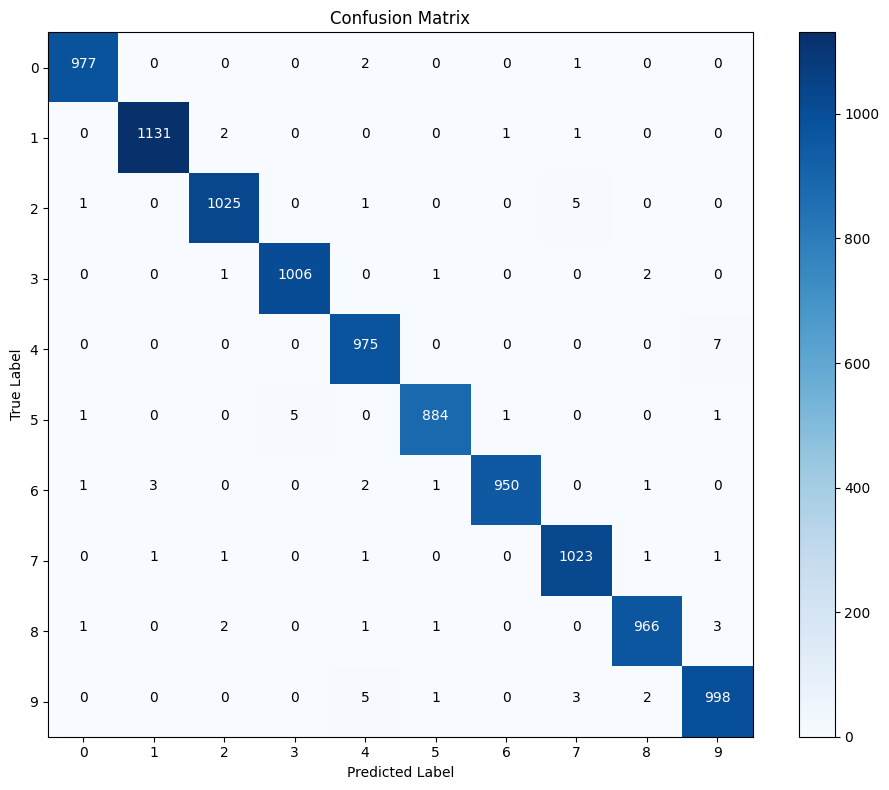

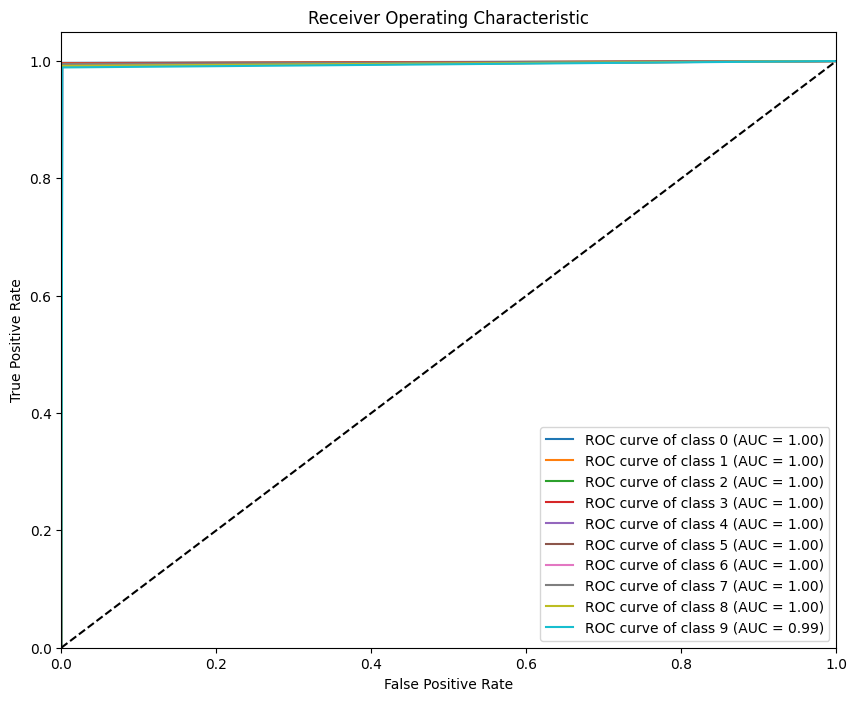

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

precision = precision_score(y_true_labels, y_pred_labels,average='macro')
recall = recall_score(y_true_labels, y_pred_labels,average='macro')
f1 = f1_score(y_true_labels, y_pred_labels,average='macro')

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.0
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Plot ROC
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Epoch 1/30


2023-05-16 11:42:55.376750: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


469/469 [==============================] - 10s 21ms/step - loss: 0.4073 - accuracy: 0.8719 - val_loss: 0.0597 - val_accuracy: 0.9804
Epoch 2/30
469/469 [==============================] - 10s 21ms/step - loss: 0.1332 - accuracy: 0.9591 - val_loss: 0.0553 - val_accuracy: 0.9813
Epoch 3/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0946 - accuracy: 0.9705 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 4/30
469/469 [==============================] - 10s 20ms/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0262 - val_accuracy: 0.9897
Epoch 5/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.0324 - val_accuracy: 0.9895
Epoch 6/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.0243 - val_accuracy: 0.9914
Epoch 7/30
469/469 [==============================] - 10s 20ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0226 - val_accuracy: 0.9928
Epo

Test loss: 0.02065403200685978
Test accuracy: 0.9922999739646912
313/313 [==============================] - 1s 2ms/step


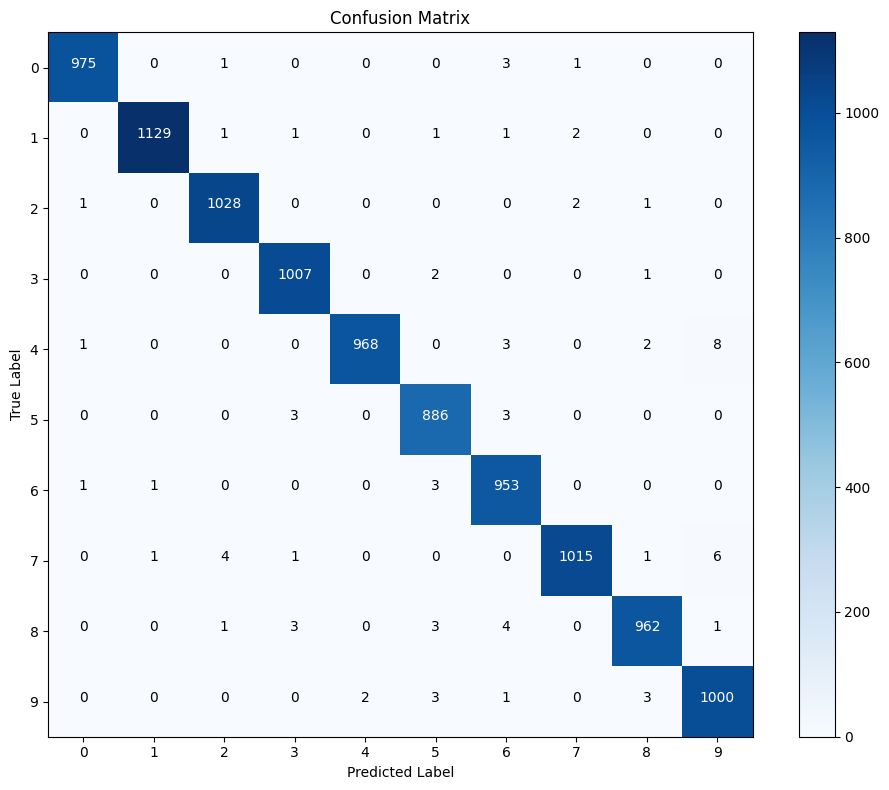

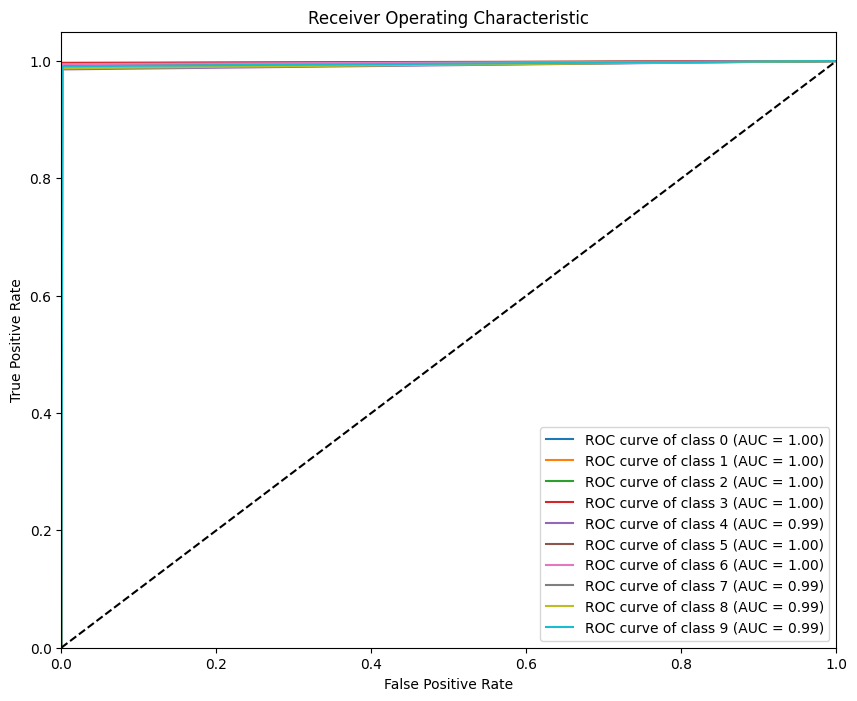

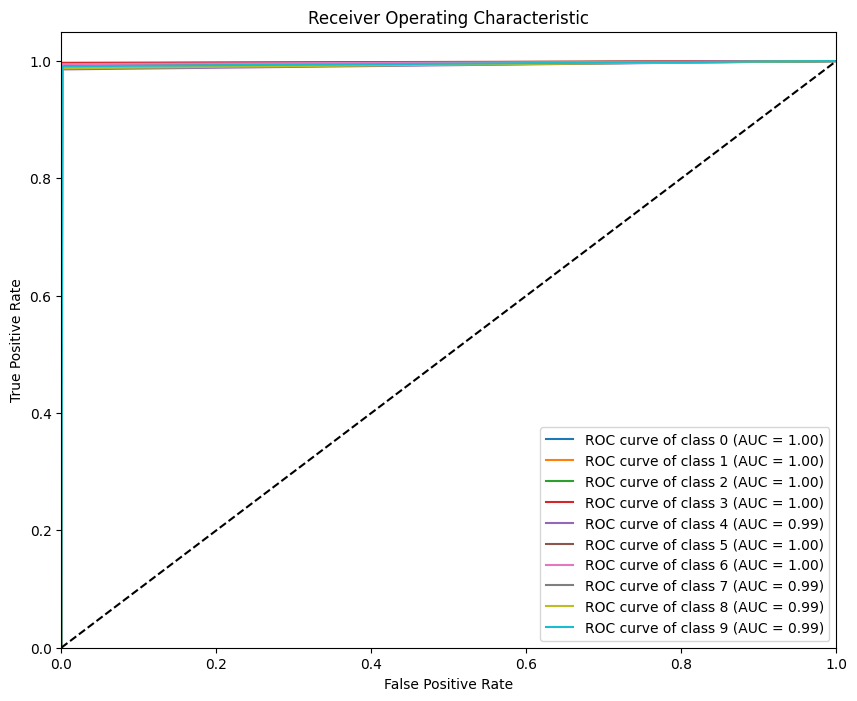